### 1.4.3 学習用のソースコード

In [1]:
# モデル定義ファイルの読み込み
@show include("../common/optimizer.jl")
@show include("../dataset/spiral.jl")
@show include("./two_layer_net.jl")

include("../common/optimizer.jl") = Main.Optimizer
include("../dataset/spiral.jl") = Main.Spiral
include("./two_layer_net.jl") = Main.Two_layer_net


Main.Two_layer_net

In [2]:
# モジュールの読み込み
using .Optimizer
using .Spiral
using .Two_layer_net
using Random
using Plots
gr()

Plots.GRBackend()

In [3]:
# ハイパーパラメータの設定
max_epoch = 300
batch_size = 10
hidden_size = 10
learning_rate = 1.0

1.0

In [4]:
x, t = load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

seed = 1984


SGD(1.0)

In [5]:
# 学習で使用する変数
data_size = size(x ,1) # 300
max_iters = data_size ÷ batch_size # 整数除算「÷」は「\div」で入力 cf. https://docs.julialang.org/en/v1/manual/unicode-input/
loss_list = []

Any[]

In [6]:
function train!(model::TwoLayerNet, batch_x, batch_t)
    # 損失を計算
    loss = forward(model, batch_x, batch_t) # model.forward()
    # 勾配を求める
    backward(model) # model.backward()
    # パラメータを更新
    update(optimizer, model.params, model.grads)
    
    push!(loss_list, loss)
    return loss
end

train! (generic function with 1 method)

In [7]:
function train!(model::TwoLayerNet, max_epoch, max_iters, train_x, train_t)
    total_loss = 0
    loss_count = 0
    
    for epoch = 1:max_epoch
        # ミニバッチの生成
        indices = rand(1:data_size, batch_size) # 1～data_sizeの範囲の一意な数値を要素に持つ要素数data_sizeのVectorを返す
        batch_x = train_x[indices, :]
        batch_t = train_t[indices, :]
        
        for iter = 1:max_iters
            loss = train!(model, batch_x, batch_t)
            total_loss += loss
            loss_count += 1
            # 定期的に学習経過を出力
            if iter % max_iters == 0
                avg_loss = total_loss / loss_count
                println("| epoch $(epoch) | iter $(iter) / $(max_iters) | loss $(round(avg_loss, digits=2))")
                push!(loss_list, avg_loss)
                total_loss, loss_count = 0, 0
            end
        end
    end
end

train! (generic function with 2 methods)

In [8]:
@time train!(model, max_epoch, max_iters, x, t)

| epoch 1 | iter 30 / 30 | loss 9.54
| epoch 2 | iter 30 / 30 | loss 10.66
| epoch 3 | iter 30 / 30 | loss 9.45
| epoch 4 | iter 30 / 30 | loss 9.22
| epoch 5 | iter 30 / 30 | loss 7.55
| epoch 6 | iter 30 / 30 | loss 7.81
| epoch 7 | iter 30 / 30 | loss 8.45
| epoch 8 | iter 30 / 30 | loss 8.48
| epoch 9 | iter 30 / 30 | loss 6.24
| epoch 10 | iter 30 / 30 | loss 7.31
| epoch 11 | iter 30 / 30 | loss 7.27
| epoch 12 | iter 30 / 30 | loss 6.83
| epoch 13 | iter 30 / 30 | loss 8.46
| epoch 14 | iter 30 / 30 | loss 5.68
| epoch 15 | iter 30 / 30 | loss 3.94
| epoch 16 | iter 30 / 30 | loss 5.47
| epoch 17 | iter 30 / 30 | loss 7.07
| epoch 18 | iter 30 / 30 | loss 4.77
| epoch 19 | iter 30 / 30 | loss 5.29
| epoch 20 | iter 30 / 30 | loss 4.93
| epoch 21 | iter 30 / 30 | loss 5.43
| epoch 22 | iter 30 / 30 | loss 1.18
| epoch 23 | iter 30 / 30 | loss 7.67
| epoch 24 | iter 30 / 30 | loss 3.35
| epoch 25 | iter 30 / 30 | loss 3.12
| epoch 26 | iter 30 / 30 | loss 3.77
| epoch 27 | iter 30

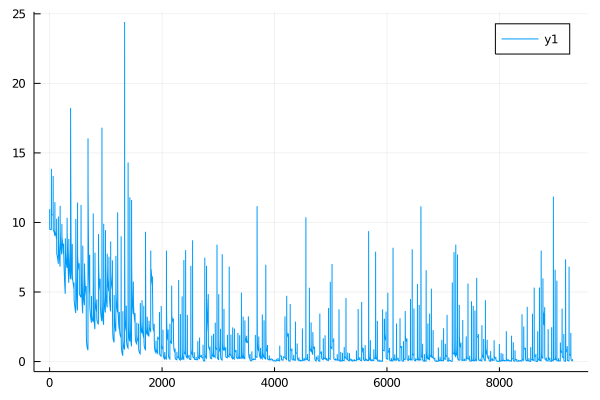

In [9]:
# 損失履歴を描画
plot(loss_list)